#Logistic Regression for Imbalanced Dataset


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [92]:
from collections import Counter
from sklearn.datasets import make_classification

In [93]:
X,y = make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)

In [94]:
X

array([[ 1.45122049, -1.08670474],
       [ 2.08029047, -0.97808443],
       [ 1.91805213, -1.0431487 ],
       ...,
       [ 0.83675119, -0.54161851],
       [ 0.45782986, -1.05177133],
       [ 0.27891721, -1.16309231]])

In [98]:
Counter(y)

Counter({0: 985, 1: 15})

<Axes: xlabel='0', ylabel='1'>

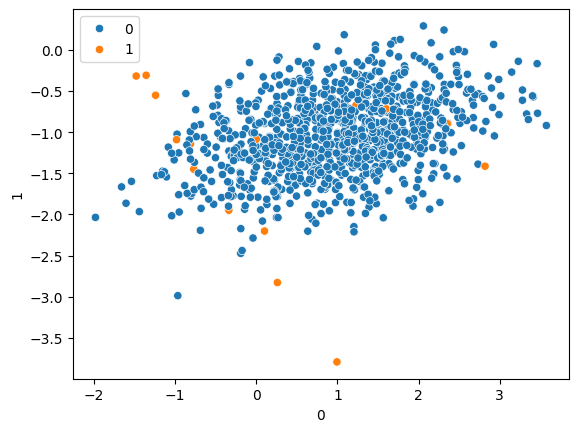

In [105]:
# Plotting the datapoints of two independent features
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)


In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)


In [112]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model


LogisticRegression()

In [184]:
penalty  = ['l1','l2','elasticnet']
c_values= [100,10,1.0,0.1,0.01]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [185]:
params = dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [186]:
params


{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [189]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()


In [190]:
grid = GridSearchCV(estimator=model, param_grid=params, cv=5)

In [191]:
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']})

In [192]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']})

In [193]:
grid.best_params_

{'C': 10, 'class_weight': {0: 100, 1: 10}, 'penalty': 'l2', 'solver': 'sag'}

In [196]:
y_pred = grid.predict(X_test)

In [194]:
grid.best_score_

0.9866666666666667

In [195]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [197]:
score = accuracy_score(y_test,y_pred)
print(score)
cn = confusion_matrix(y_test,y_pred)
print(cn)
print(classification_report(y_test,y_pred))


0.984
[[246   0]
 [  4   0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       246
           1       0.00      0.00      0.00         4

    accuracy                           0.98       250
   macro avg       0.49      0.50      0.50       250
weighted avg       0.97      0.98      0.98       250

